In [ ]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load grayscale image
img = cv2.imread('tahirjan.jpeg', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (256, 256))  # resize for transform methods
img_f = np.float32(img)


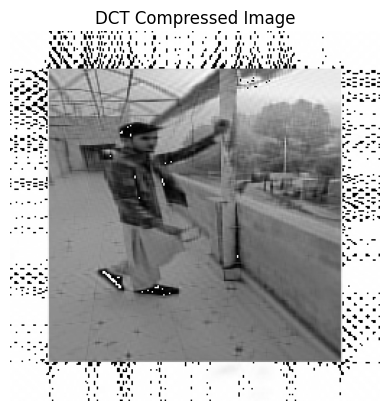

In [4]:
from scipy.fftpack import dct, idct

def dct2(a):
    return dct(dct(a.T, norm='ortho').T, norm='ortho')

def idct2(a):
    return idct(idct(a.T, norm='ortho').T, norm='ortho')

# Apply DCT
dct_transformed = dct2(img_f)

# Compression: Zero out small frequency coefficients
dct_transformed[60:, 60:] = 0

# Reconstruct image
reconstructed = idct2(dct_transformed)

plt.imshow(np.uint8(reconstructed), cmap='gray')
plt.title("DCT Compressed Image")
plt.axis('off')
plt.show()


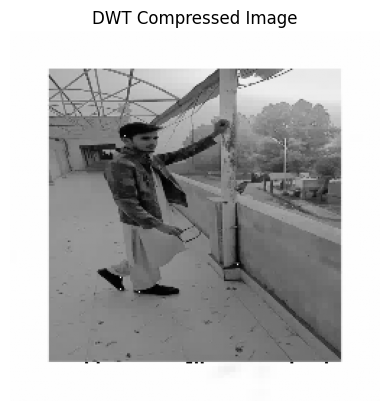

In [5]:
import pywt

# Apply 2-level Haar Wavelet transform
coeffs = pywt.wavedec2(img_f, 'haar', level=2)
arr, slices = pywt.coeffs_to_array(coeffs)

# Compression: Threshold small values
arr[np.abs(arr) < 10] = 0

# Reconstruct image
coeffs2 = pywt.array_to_coeffs(arr, slices, output_format='wavedec2')
img_dwt = pywt.waverec2(coeffs2, 'haar')

plt.imshow(np.uint8(img_dwt), cmap='gray')
plt.title("DWT Compressed Image")
plt.axis('off')
plt.show()


In [7]:
def rle_encode(img):
    pixels = img.flatten()
    encoded = []
    prev = pixels[0]
    count = 1
    for p in pixels[1:]:
        if p == prev:
            count += 1
        else:
            encoded.append((prev, count))
            prev = p
            count = 1
    encoded.append((prev, count))
    return encoded

rle_data = rle_encode(img)
print("Encoded Length:", len(rle_data))


Encoded Length: 33003


In [9]:
from collections import Counter
import heapq

def build_huffman_tree(data):
    freq = Counter(data)
    heap = [[weight, [symbol, ""]] for symbol, weight in freq.items()]
    heapq.heapify(heap)
    while len(heap) > 1:
        lo = heapq.heappop(heap)
        hi = heapq.heappop(heap)
        for pair in lo[1:]: pair[1] = '0' + pair[1]
        for pair in hi[1:]: pair[1] = '1' + pair[1]
        heapq.heappush(heap, [lo[0] + hi[0]] + lo[1:] + hi[1:])
    return dict(heap[0][1:])

flat_pixels = img.flatten().tolist()
huff_dict = build_huffman_tree(flat_pixels)

print("Sample Huffman Codes:", list(huff_dict.items())[:10])


Sample Huffman Codes: [(148, '000000'), (139, '000001'), (173, '000010000'), (22, '0000100010'), (195, '0000100011'), (66, '000010010'), (5, '000010011'), (63, '000010100'), (160, '000010101'), (207, '0000101100')]
